In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('austin_weather.csv')
df.head()


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [3]:
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

# **📌 1. Data Cleaning & Preprocessing**

In [4]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("austin_weather.csv")

# Replace 'T' (trace precipitation) and '-' (missing values) with 0 or NaN
df.replace('T', 0, inplace=True)
df.replace('-', np.nan, inplace=True)

# Convert all applicable columns to numeric (ignore 'Date' and 'Events')
for col in df.columns[1:20]:  # Skip Date and Events
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with any remaining missing values
df.dropna(inplace=True)


# **📌 2. Feature Engineering**

In [5]:
df.drop(['Events'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])


# **📌 3. Exploratory Data Analysis (EDA)**

A. Visualize Precipitation Over Time


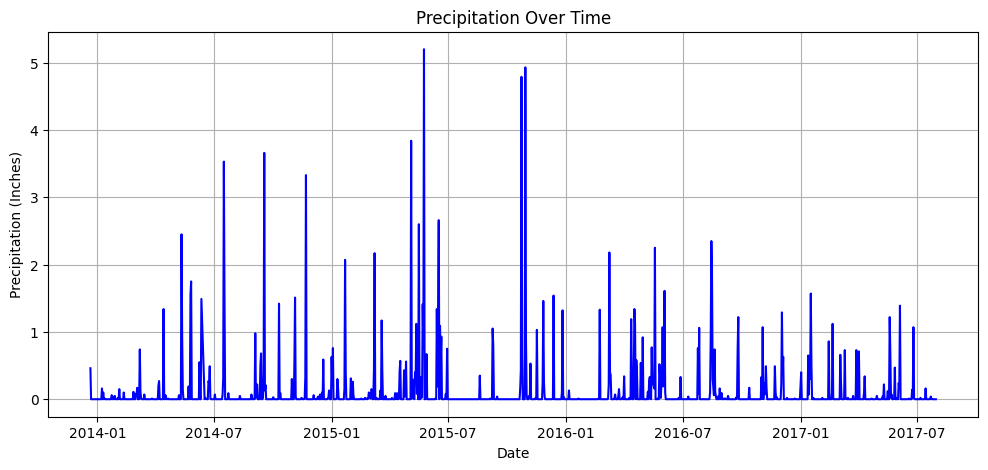

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['PrecipitationSumInches'], color='blue')
plt.title("Precipitation Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.grid(True)
plt.show()


B. Correlation Heatmap

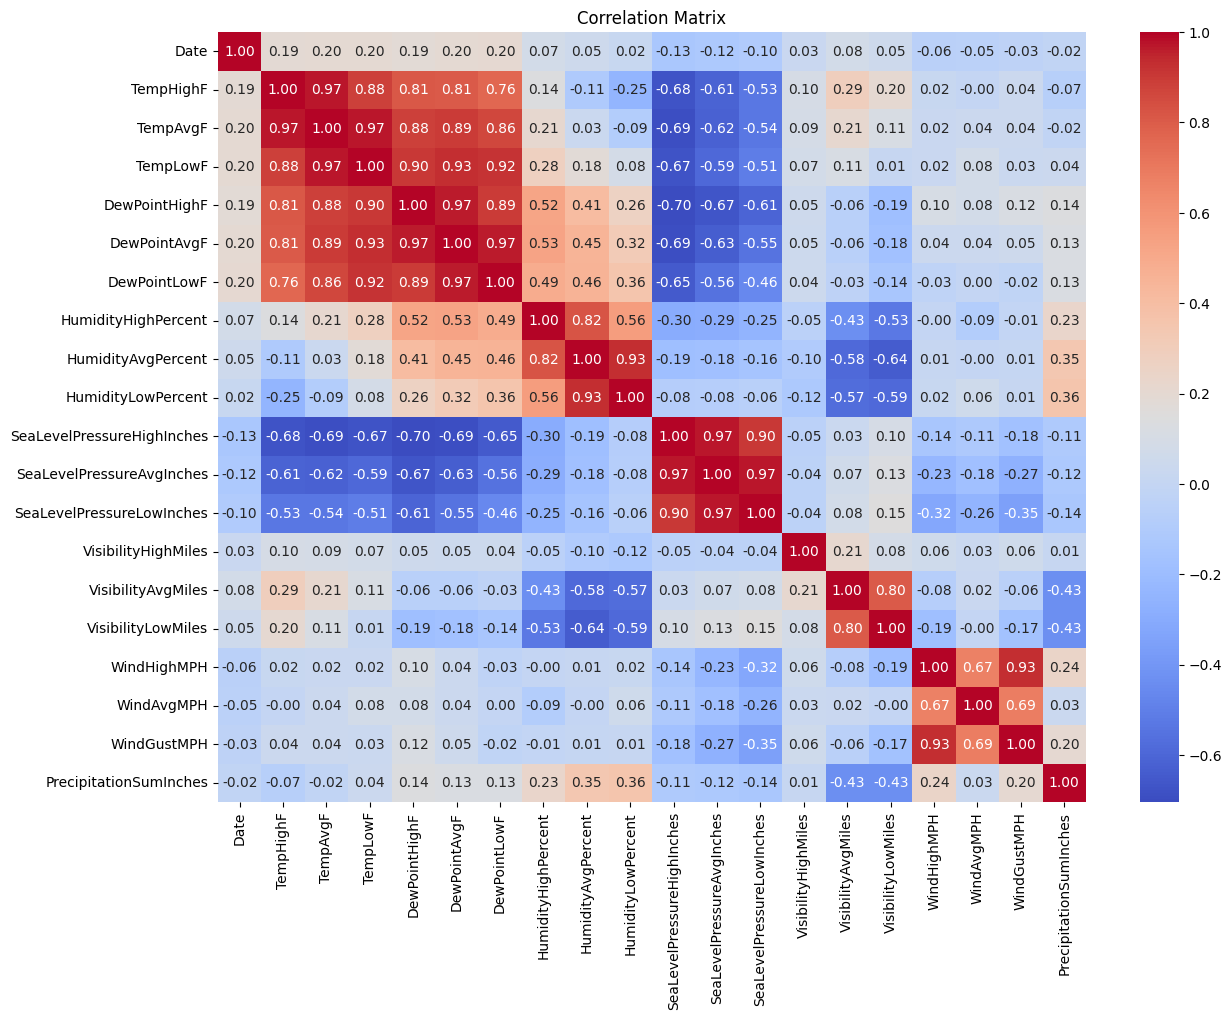

In [7]:
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# **📌 4. Linear Regression Model**

A. Define Features and Target

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and Target
X = df.drop(['Date', 'PrecipitationSumInches'], axis=1)
y = df['PrecipitationSumInches']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


B. Train Model

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 0.06990247004603659
R-squared: 0.22106091287108243


# **📌 5. Visualize Predictions vs Actual**

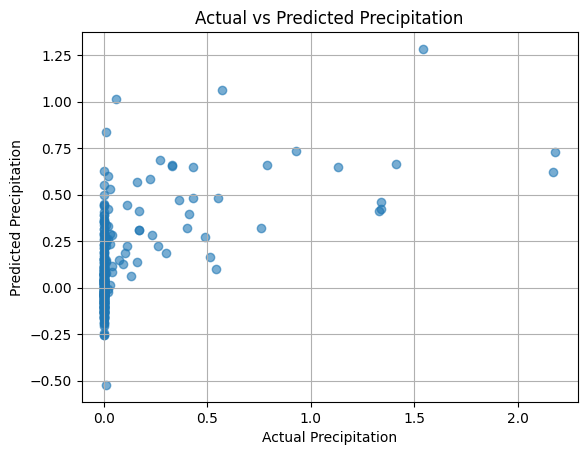

In [10]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.title("Actual vs Predicted Precipitation")
plt.grid(True)
plt.show()


# 🌧️ Rainfall Prediction Using Austin Weather Data

This project aims to build a **Linear Regression model** to predict **daily precipitation** using historical weather data from Austin, Texas. The dataset includes key weather indicators such as temperature, dew point, humidity, visibility, pressure, wind speed, and weather events over multiple years.

---

## 📁 Dataset Overview

- **Source**: Historical weather data from Austin
- **Rows**: 1319 days of data
- **Columns**: 21 weather-related features including:
  - Temperature (High/Avg/Low)
  - Dew Point
  - Humidity
  - Sea Level Pressure
  - Visibility
  - Wind Speed and Gust
  - Events (Rain, Thunderstorm, etc.)
  - Precipitation (target variable)

---

## 🔍 Objective

To predict the **`PrecipitationSumInches`** using other weather features via **Linear Regression** and analyze key weather factors influencing rainfall.

---

## 🧠 Methodology

### 1. **Data Cleaning & Preprocessing**
- Replaced non-numeric entries like `'T'` (trace values) and `'-'` (missing) with `0` or `NaN`.
- Converted all applicable columns to numeric data types.
- Dropped rows with remaining missing values.
- Parsed the `Date` column to datetime format for visualization.
- Dropped `Events` due to inconsistent formatting and high cardinality.

### 2. **Exploratory Data Analysis (EDA)**
- **Line plot** of daily rainfall trends over time.
- **Correlation matrix** heatmap to identify relationships between features.
- Identified strong positive correlation between:
  - Humidity and Precipitation
  - Dew Point and Precipitation
  - Negative or weak correlation with visibility and pressure.

### 3. **Modeling: Linear Regression**
- Features: All numeric weather columns excluding `Date` and `PrecipitationSumInches`.
- Target: `PrecipitationSumInches`
- Tools: `scikit-learn` for train/test split, model training, and evaluation.

---

## 📊 Evaluation Metrics

| Metric               | Value                   |
|----------------------|-------------------------|
| Mean Squared Error   | *0.06990247004603659*   |
| R² Score             | *0.22106091287108243*   |


---

## 📈 Visualizations

- **Scatter plot**: Actual vs Predicted Rainfall
- **Time Series Plot**: Rainfall over time
- **Heatmap**: Feature correlation matrix

---

## 🔑 Key Findings

- **Humidity**, **Dew Point**, and **Wind Gusts** are major contributors to rainfall.
- **Visibility** and **Pressure** show inverse or weak relationships with precipitation.
- Linear regression performs moderately well, but more complex models (e.g., Random Forest, XGBoost) could improve accuracy.

---

## ✅ Next Steps

- Try polynomial or tree-based models for better prediction performance.
- Perform feature importance analysis.
- Incorporate `Events` via NLP preprocessing or one-hot encoding.
- Deploy the model as a **Streamlit** web app for interactive predictions.

---

## 📂 Files in Repository

- `austin_weather.csv`: Raw dataset
- `rainfall_prediction.ipynb`: Jupyter notebook with full code
- `README.md`: Project overview and explanation
- `output_plots/`: Contains plots used for analysis

---

## 🤝 Acknowledgements

Thanks to the data providers and open-source contributors who make weather datasets accessible.

---

